# TO PREDICT THE FUTURE ATTRITION ON THE COLLECTED HUMAN RESOURCE DATA


In [1]:
import numpy as np #performing mathematical on array
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data Collection and Processing

In [2]:
#loding the csv data to a pandas dataframe
data=pd.read_csv("Human Resource.csv")
data_copy = data.copy()

In [3]:
#print first 5 rows of the dataset
data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
#print last 5 of the of the dataset
data.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [5]:
#number of rows and column in the dataset
data.shape

(14999, 10)

In [6]:
#getting some info about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [7]:
#checking for some missing values
data.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

In [8]:
#statistical measure about the data
data.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [9]:
#checking for all columns in data
data.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
data.Department.unique()

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [11]:
#checking the distribution left variables
data["left"].value_counts()
data["time_spend_company"].value_counts()

3     6443
2     3244
4     2557
5     1473
6      718
10     214
7      188
8      162
Name: time_spend_company, dtype: int64

In [12]:
stay=data[data.left==0] 
lt=data[data.left==1]
print(stay)


       satisfaction_level  last_evaluation  number_project  \
2000                 0.58             0.74               4   
2001                 0.82             0.67               2   
2002                 0.45             0.69               5   
2003                 0.78             0.82               5   
2004                 0.49             0.60               3   
...                   ...              ...             ...   
14206                0.90             0.55               3   
14207                0.74             0.95               5   
14208                0.85             0.54               3   
14209                0.33             0.65               3   
14210                0.50             0.73               4   

       average_montly_hours  time_spend_company  Work_accident  left  \
2000                    215                   3              0     0   
2001                    202                   3              0     0   
2002                    193            

In [13]:
print(lt)

       satisfaction_level  last_evaluation  number_project  \
0                    0.38             0.53               2   
1                    0.80             0.86               5   
2                    0.11             0.88               7   
3                    0.72             0.87               5   
4                    0.37             0.52               2   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
0                       157                   3              0     1   
1                       262                   6              0     1   
2                       272            

In [14]:
stay.shape

(11428, 10)

In [15]:
lt.shape

(3571, 10)

<AxesSubplot:xlabel='Department', ylabel='count'>

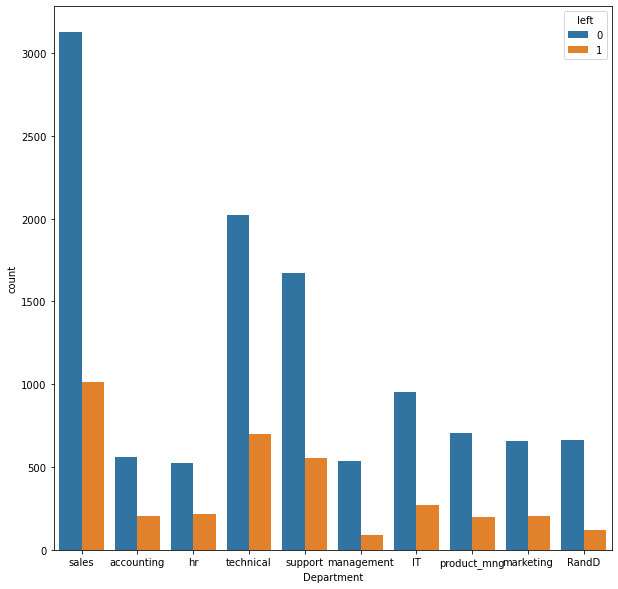

In [16]:
plt.figure(figsize=(10,10))
sns.countplot('Department',hue='left',data=data)
##As we can see the sales department employee has more attrition 

<AxesSubplot:xlabel='Work_accident', ylabel='count'>

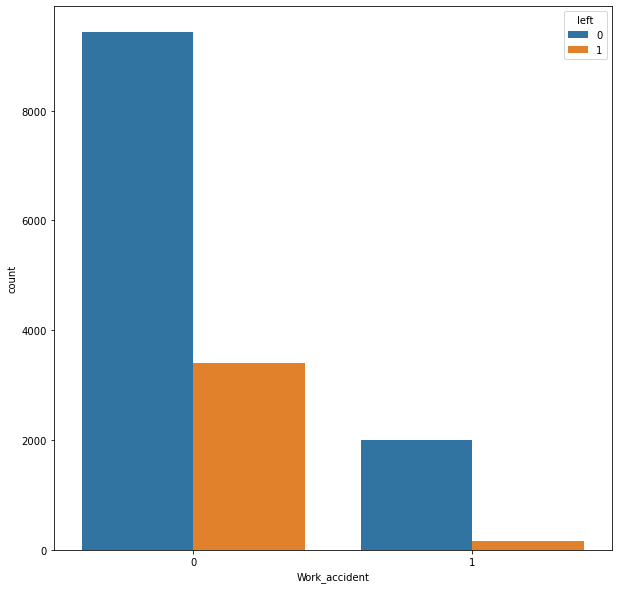

In [17]:
plt.figure(figsize=(10,10))
sns.countplot('Work_accident',hue='left',data=data)
#we can identifie that employee who does not had work accident have more no of attrition

<AxesSubplot:xlabel='promotion_last_5years', ylabel='count'>

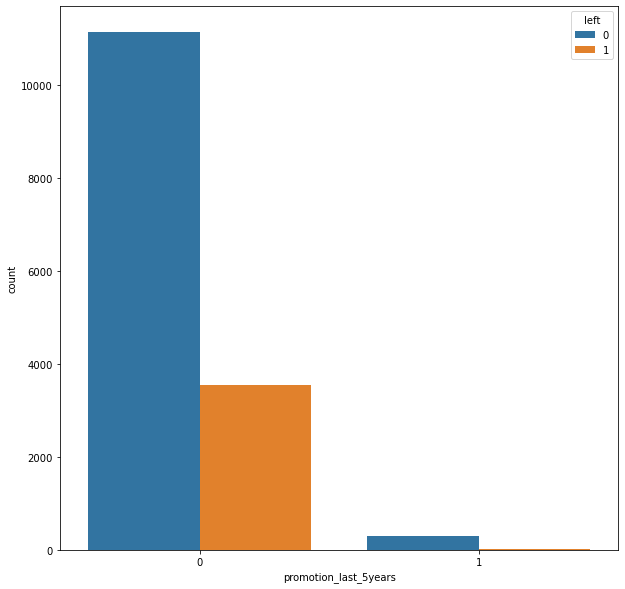

In [18]:
plt.figure(figsize=(10,10))
sns.countplot('promotion_last_5years',hue='left',data=data)
#we can identifie that employee's who did not got promotion in last 5 years has more no of attrition

<AxesSubplot:xlabel='number_project', ylabel='count'>

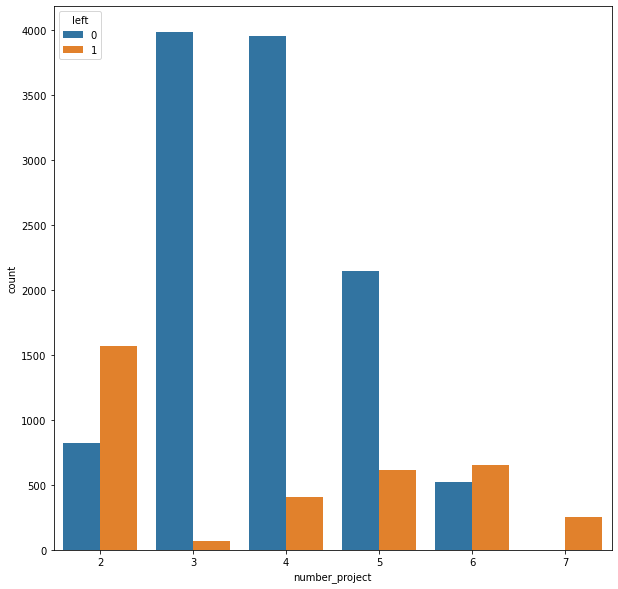

In [19]:
plt.figure(figsize=(10,10))
sns.countplot('number_project',hue='left',data=data)
#we can identifie that employee's who got 2 or less than 2 projects has more number of attrition

<AxesSubplot:xlabel='time_spend_company', ylabel='count'>

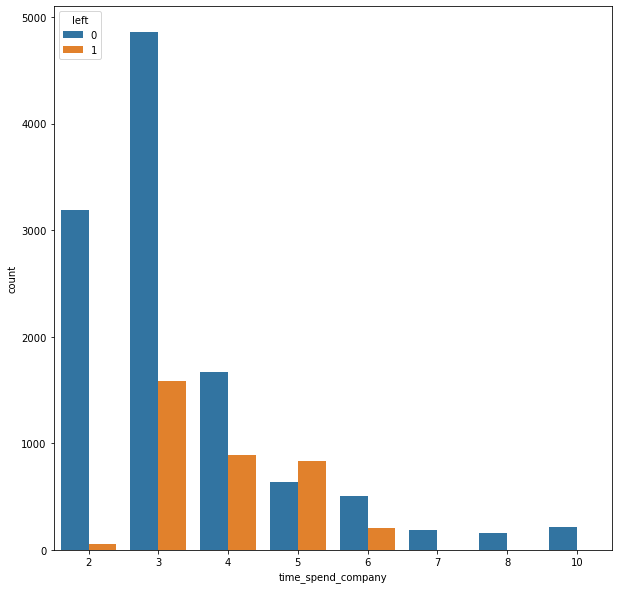

In [20]:
plt.figure(figsize=(10,10))
sns.countplot('time_spend_company',hue='left',data=data)
#we can identifie that employee's who spent time between 3 to 6 has more no of attrition

<AxesSubplot:xlabel='sat_band', ylabel='count'>

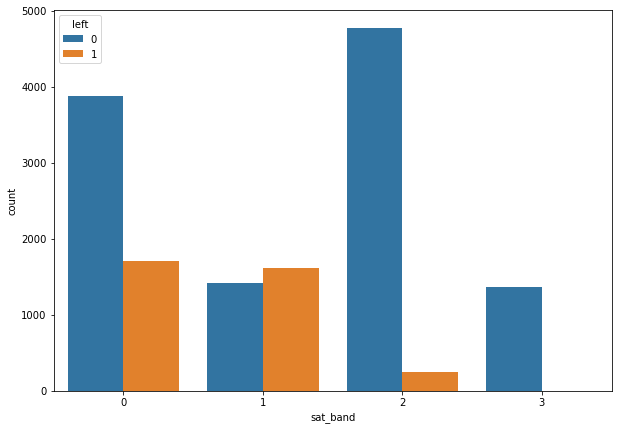

In [21]:
#satisfaction_level start from 0.0 to 1.0 
data['sat_band']=0
data.loc[(data['satisfaction_level']>=0.0) & (data['satisfaction_level']<=0.25),'sat_band']=0
data.loc[(data['satisfaction_level']>0.25) & (data['satisfaction_level']<=0.50),'sat_band']=1
data.loc[(data['satisfaction_level']>0.50) & (data['satisfaction_level']<=0.75),'sat_band']=2
data.loc[(data['satisfaction_level']>0.92),'sat_band']=3
data[['satisfaction_level','sat_band']].head()
plt.figure(figsize=(10,7))
sns.countplot('sat_band',hue='left',data=data)
# we can identifie that employee's who rated between 0.0 to 0.75 has more attrition


<AxesSubplot:xlabel='last_band', ylabel='count'>

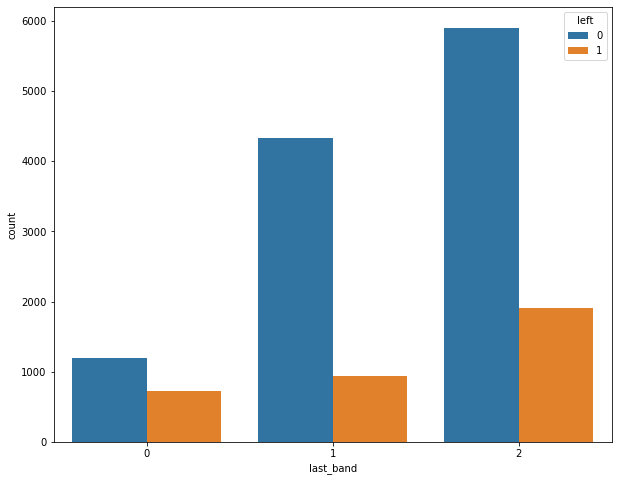

In [22]:

data['last_band']=0
data.loc[(data['last_evaluation']>=0) & (data['last_evaluation']<=0.5),'last_band']=0
data.loc[(data['last_evaluation']>0.5) & (data['last_evaluation']<=0.7),'last_band']=1
data.loc[(data['last_evaluation']>0.7) & (data['last_evaluation']<=1.0),'last_band']=2
data[['last_evaluation','last_band']].head()
plt.figure(figsize=(10,8))
sns.countplot('last_band',hue='left',data=data)
#we can identifie the employee's who got rating more than 0.7 have more attrition

<AxesSubplot:xlabel='salary', ylabel='count'>

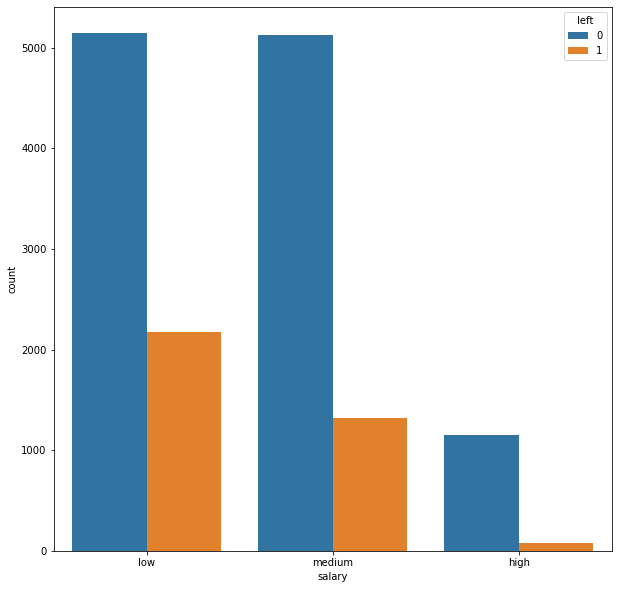

In [23]:
plt.figure(figsize=(10,10))
sns.countplot('salary',hue='left',data=data)
#It can be clearly seen that most of the employees who left the job were earning low income or medium income 
#and very less proportion of employees are there who left their job and were earning hign income.
#This implies that Salary is a major factor in determining the Employee Retention

In [24]:
data

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary,sat_band,last_band
0,0.38,0.53,2,157,3,0,1,0,sales,low,1,1
1,0.80,0.86,5,262,6,0,1,0,sales,medium,0,2
2,0.11,0.88,7,272,4,0,1,0,sales,medium,0,2
3,0.72,0.87,5,223,5,0,1,0,sales,low,2,2
4,0.37,0.52,2,159,3,0,1,0,sales,low,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low,1,1
14995,0.37,0.48,2,160,3,0,1,0,support,low,1,0
14996,0.37,0.53,2,143,3,0,1,0,support,low,1,1
14997,0.11,0.96,6,280,4,0,1,0,support,low,0,2


<AxesSubplot:>

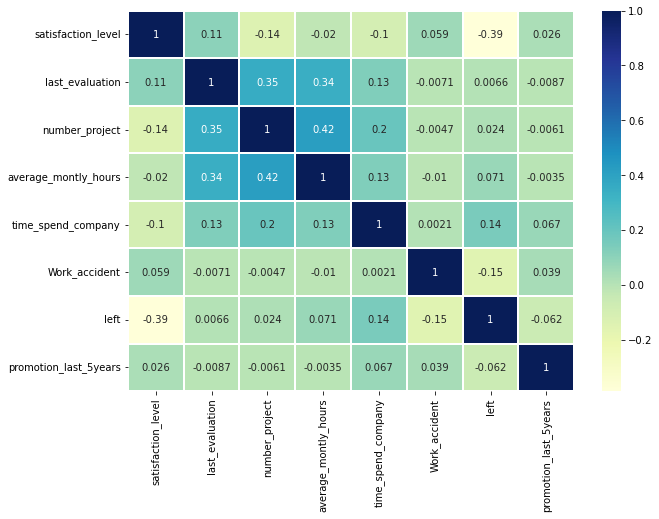

In [25]:
%matplotlib inline
plt.figure(figsize=(10,7))
sns.heatmap(data_copy.corr(),annot=True,cmap="YlGnBu",linewidths=0.2)
#3 negative correlation – satisfaction level, work accident and promotion last 5 year(negligible)


In [26]:
data["left"].value_counts()

0    11428
1     3571
Name: left, dtype: int64

In [27]:
stay_sample=stay.sample(n=3571)#taking sample values from stay 
new=pd.concat([stay_sample,lt],axis=0)

In [28]:
new.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
6844,0.76,0.77,5,234,3,0,0,0,support,low
4369,0.84,0.97,4,253,2,1,0,0,sales,low
11152,0.99,0.80,3,209,2,0,0,0,support,medium
3837,0.76,0.65,3,220,3,0,0,0,sales,low
9273,0.50,0.64,3,249,2,1,0,0,technical,low


In [29]:
new.tail()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low
14998,0.37,0.52,2,158,3,0,1,0,support,low


In [30]:
new["left"].value_counts()

0    3571
1    3571
Name: left, dtype: int64

In [31]:
new.groupby("left").mean()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.659667,0.716690,3.777653,198.958835,3.396528,0.175301,0.024083
1,0.440098,0.718113,3.855503,207.419210,3.876505,0.047326,0.005321


In [32]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Department','salary']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(new[col])
    new[col] = label_encoder.transform(new[col])
x=new.drop(columns=["left"],axis=1)
y=new["left"]
print(x)
print("........................................................")
print(y)

       satisfaction_level  last_evaluation  number_project  \
6844                 0.76             0.77               5   
4369                 0.84             0.97               4   
11152                0.99             0.80               3   
3837                 0.76             0.65               3   
9273                 0.50             0.64               3   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  \
6844                    234                   3              0   
4369                    253                   2              1   
11152                   209                   2          

In [33]:
new.head()
new['Department'].unique()

array([8, 7, 9, 2, 4, 5, 3, 6, 0, 1])

In [34]:
new['salary'].unique()

array([1, 2, 0])

In [35]:
print(new)

       satisfaction_level  last_evaluation  number_project  \
6844                 0.76             0.77               5   
4369                 0.84             0.97               4   
11152                0.99             0.80               3   
3837                 0.76             0.65               3   
9273                 0.50             0.64               3   
...                   ...              ...             ...   
14994                0.40             0.57               2   
14995                0.37             0.48               2   
14996                0.37             0.53               2   
14997                0.11             0.96               6   
14998                0.37             0.52               2   

       average_montly_hours  time_spend_company  Work_accident  left  \
6844                    234                   3              0     0   
4369                    253                   2              1     0   
11152                   209            

Steps To Be followed When Applying an Algorithm
 1.Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will      help in training the model better.
 2.Select any algorithm based on the problem (classification or regression) whatever its good.
 3.Then pass the training dataset to the algorithm to train it. We use the .fit() method
 4.Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
 5.We then check the accuracy by passing the predicted outcome and the actual output to the model.

In [36]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression # for Logistic Regression algorithm
from sklearn import svm #for Support Vector Machine (SVM) Algorithm
from sklearn.tree import DecisionTreeClassifier#for using Decision Tree Algoithm  
from sklearn.metrics import accuracy_score  #for checking the model accuracy

# spliting data into training data and test data¶

In [37]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =0.20, random_state=2)

In [38]:
print(x.shape,x_train.shape,x_test.shape)

(7142, 9) (5713, 9) (1429, 9)


In [39]:
model=LogisticRegression()
#training the logistic regression model with training data
model.fit(x_train, y_train)#fit function is use relation between this features that are present in xtrain and corressponding taget

LogisticRegression()

In [40]:
#accuracy on training data
x_train_prediction= model.predict(x_train)
training_data_accuracy=accuracy_score(x_train_prediction,y_train)
print((training_data_accuracy)*100)

74.91685629266584


In [41]:
x_test_prediction= model.predict(x_test)
test_data_accuracy=accuracy_score(x_test_prediction,y_test)
print((test_data_accuracy)*100)

75.15745276417076


LogisticRegression is giving good accuracy value . We will continue to check the accuracy for different models.

# SVM Regression

In [42]:
model = svm.SVC() #select the algorithm
model.fit(x_train ,y_train) # we train the algorithm with the training data and the training output
prediction=model.predict(x_test) #now we pass the testing data to the trained algorithm
print(accuracy_score(y_test,prediction)*100) #now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

65.29041287613715


In [43]:
model.fit(x_test ,y_test) 
prediction=model.predict(x_train)
print(accuracy_score(y_train,prediction)*100)

65.28969018029056


# DecisionTreeClassifier¶

In [44]:
DT_model = DecisionTreeClassifier()
DT_model.fit(x_train ,y_train) # we train the algorithm with the training data and the training output
prediction=DT_model.predict(x_train)#now we pass the testing data to the trained algorithm
#print(prediction)
print((accuracy_score(y_train,prediction))*100)

100.0


In [45]:
prediction=DT_model.predict(x_test)
print((accuracy_score(y_test,prediction))*100)

95.66130160951715


In [46]:
#here giving a random data from 1.satisfaction_level,2.last_evaluation,3.number_project,4.average_montly_hours,5.
#5.time_spend_company,6.Work_accident,7.promotion_last_5years,8.Department,9.salary
input_data=(0.73,0.94,4,262,3,0,1,8,1)

In [47]:
import numpy as np
#change the input data to a numpy array
input_data_as_numpy_array=np.asarray(input_data)
#reshape the numpy arraky as we are predicting for only on instance
input_data_reshaped= input_data_as_numpy_array.reshape(1,-1)
prediction=model.predict(input_data_reshaped)
print(prediction)

[1]


In [48]:
if(prediction[0]==0):
    print("the employee working in the company")
else:
    print("The employee left the company")

The employee left the company
